## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [9]:
!pip install torch torchvision

In [10]:
!git clone https://github.com/Adnan-Khan7/Neural_Style_Transfer.git

Cloning into 'Neural_Style_Transfer'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


## Task 2 : Loading VGG Pretrained Model

In [11]:
import torch 
from torchvision import models

vgg = models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [12]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [13]:
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [15]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [33]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path,max_size = 500):
  image = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size

  else:
    size = max(image.size)

  img_transforms = T.Compose([
                    T.Resize(size),
                    T.ToTensor(),
                    T.Normalize(mean=[0.485, 0.456, 0.486],
                                std = [0.229, 0.224, 0.225])
                    
  ])
  image = img_transforms(image)

  image = image.unsqueeze(0) #(3,224,224) >> (1,3,224,244)

  return image
  

In [34]:
style_p = preprocess('/content/Neural_Style_Transfer/style1.jpg')
content_p = preprocess('/content/Neural_Style_Transfer/content1.jpg')


content_p = content_p.to(device)
style_p = style_p.to(device)

print('Content_ Shape', content_p.shape)
print('Style Shape', style_p.shape)

Content_ Shape torch.Size([1, 3, 666, 500])
Style Shape torch.Size([1, 3, 500, 799])


## Task 4 : Deprocess image

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0) #(1,3,224,224) >> (3,224,244)
  image = image.transpose(1,2,0) # (3,224,244) >> (224,224,3)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.486])

  image = image.clip(0,1)

  return image

In [36]:
content_d = deprocess(content_p)

style_d = deprocess(style_p)

print('Deprocess content shape', content_d.shape)
print('Deprocess style Shape', style_d.shape)

Deprocess content shape (666, 500, 3)
Deprocess style Shape (500, 799, 3)


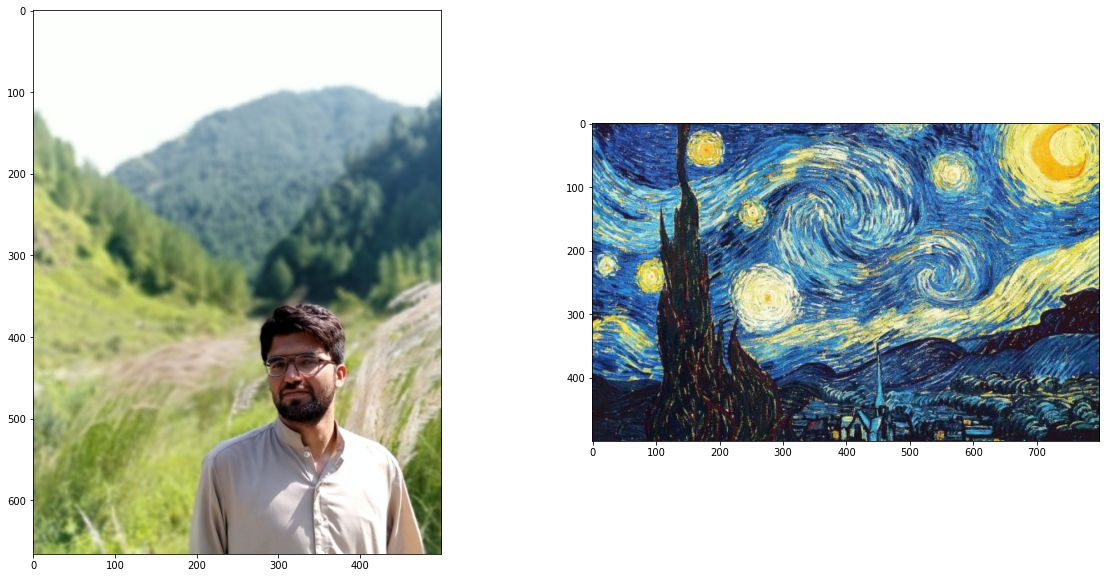

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [38]:
def get_features(image,model):
  layers = {
      '0': 'conv1_1',
      '5': 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2', #content_feature
      '28': 'conv5_1'
  }

  x = image
  Features = {}
  for name, layer in model._modules.items():
    x = layer(x)

    if  name in layers:
      Features[layers[name]] = x

  return Features



In [39]:
content_f = get_features(content_p,vgg)
style_f = get_features(style_p, vgg)

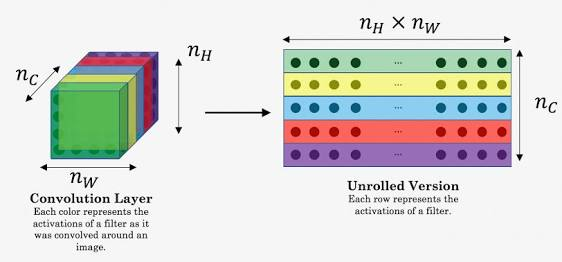

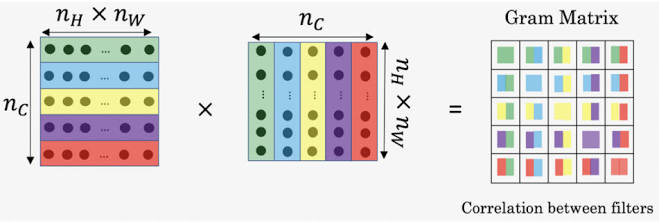

In [40]:
def gram_matrix(tensor):

  b,c,h,w = tensor.size()
  tensor = tensor.view(c,h*w)
  gram = torch.mm(tensor,tensor.t())
  return gram

In [41]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}


## Task 6 : Creating Style and Content loss function

In [42]:
def content_loss(target_conv4_2,content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [43]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}

In [44]:
def style_loss(style_weights,target_features,style_grams):

  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b,c,h,w = target_f.shape
    layer_loss = style_weights[layer] *torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)
  return loss

In [45]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target,vgg)
print('Content loss : ', content_loss(target_f['conv4_2'],content_f['conv4_2']))
print('Style Loss: ',style_loss(style_weights, target_f, style_grams))

Content loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style Loss:  tensor(2006.8521, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [46]:
from torch import optim
optimizer = optim.Adam([target], lr = 0.003)

alpha = 1
beta = 1e5
epochs = 3000
show_every = 500



In [47]:
def total_loss(c_loss,s_loss,alpha,beta):

  loss = alpha * c_loss + beta*s_loss
  return loss

In [48]:
results = []

for i in range(epochs):

  target_f = get_features(target,vgg)
  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])

  s_loss = style_loss(style_weights,target_f,style_grams)

  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print("Total loss at Epoch  {} : {}".format(i,t_loss))
    results.append(deprocess(target.detach()))

Total loss at Epoch  0 : 200685200.0
Total loss at Epoch  500 : 7827944.5
Total loss at Epoch  1000 : 1832448.375
Total loss at Epoch  1500 : 1209105.625
Total loss at Epoch  2000 : 895705.5
Total loss at Epoch  2500 : 695207.9375


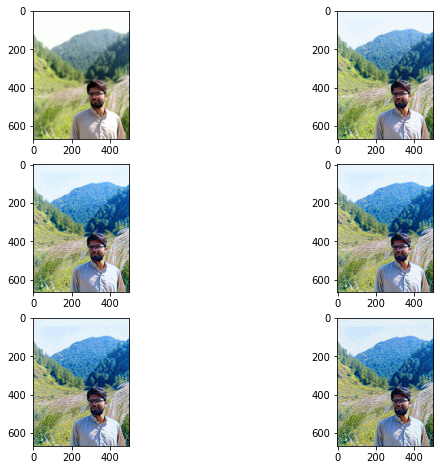

In [49]:
plt.figure(figsize = (10,8))

for i in range (len(results)):

  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

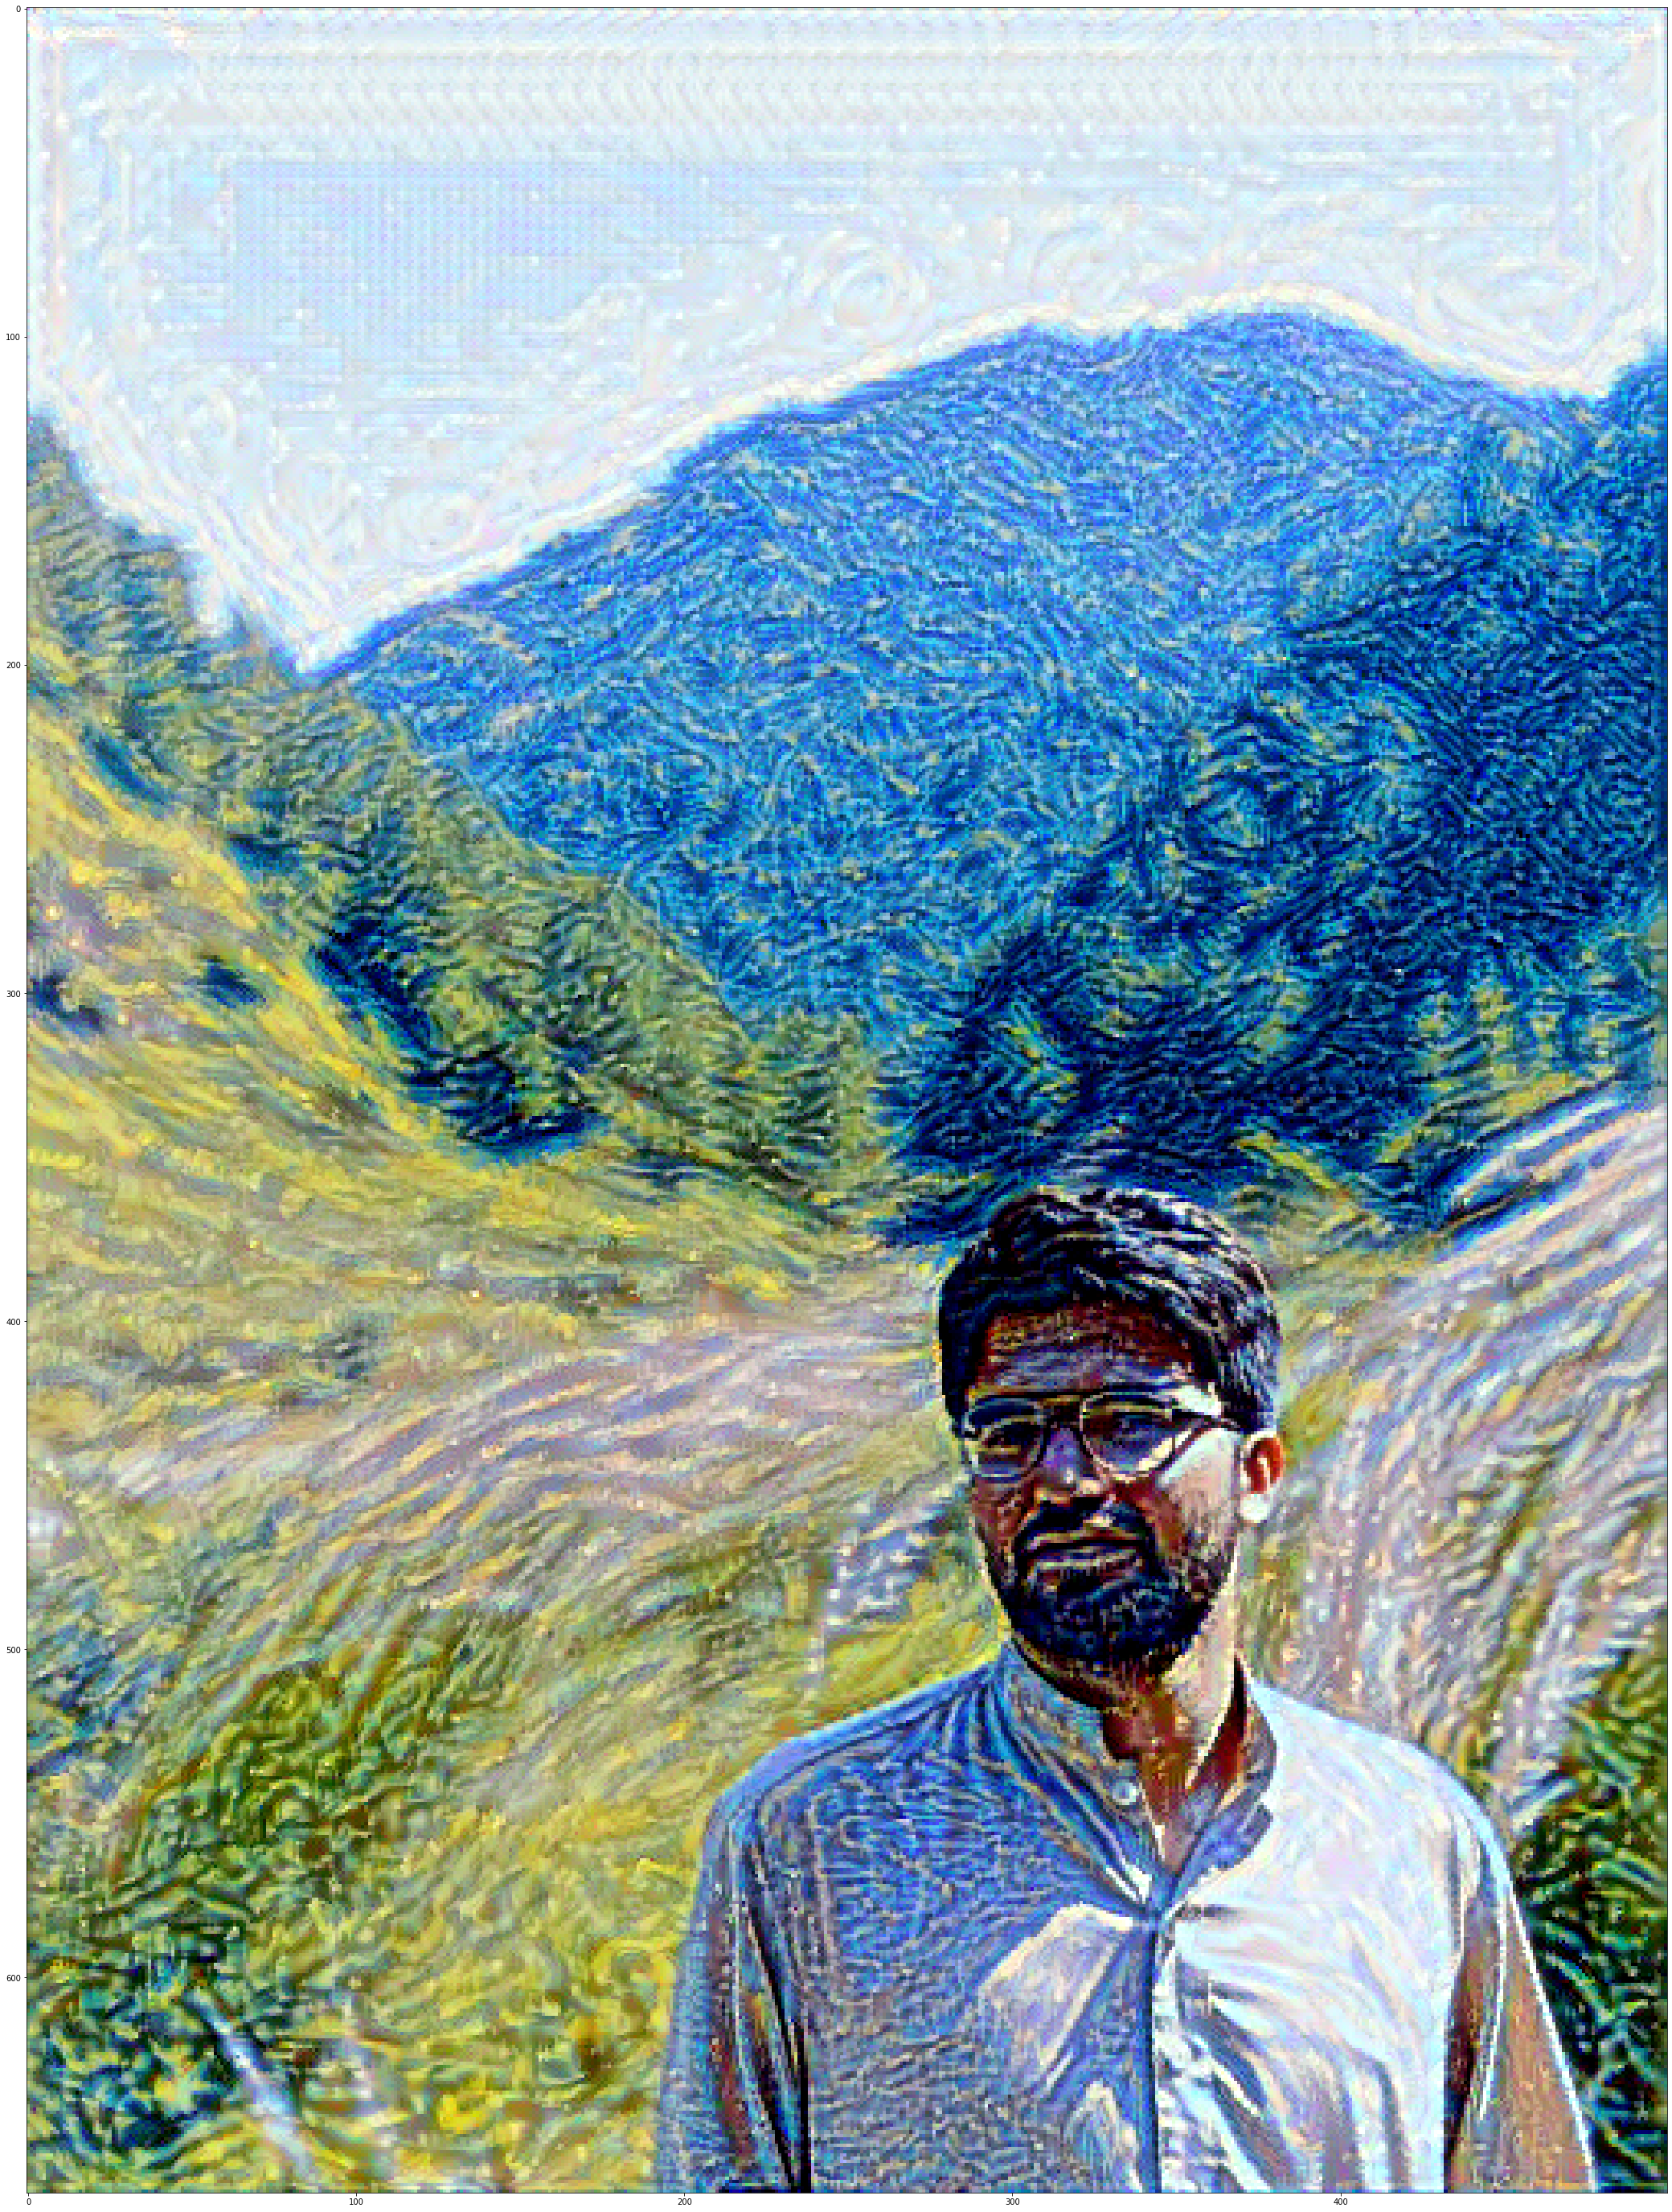

In [56]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig,(ax1) = plt.subplots(1,1,figsize = (100,50))
ax1.imshow(target_copy)
#ax2.imshow(content_copy)